<h1>Jamaica Stock Exchange Analysis  </h1>
<p> Basic anslysis data sciences information </p>
<ul> 
<li> Calculate Simple Rate of Return </li>
<li> Stock Risk calculation
<li> Adjustment of split stocks 2015-2018</li>
<li> Adjust for dividends to stock analysis </li>    
<li> Bollinger Band to stock analysis </li>        
<li> Calculate Rate of Return for Portfolio </li>
<li> Calculate Risk Variance for Portfolio </li>
<li> Sharpe stocks Calculation</li>
<li> JSE-Index vs Price Regression on stocks </li>
<li> Markowitz Portfolio effeciency </li>
<li> CAPM - Capital Asset Pricing Model </li>
<li> <i>MACDs</li>
</ul>

<p><b> #Todo </b><i>Predictive Model</i></p>
<p><b> #Todo </b><i>Implement PixieDust</i></p>



<p>&copy; 2018 Romayne Whyte (Ijasoft) <p>


In [ ]:
import pandas as pd
import numpy as np
import os
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import dataset as dt
import analysis_macd as macd
import statsmodels.api as sm
from scipy import stats
from scipy import linalg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pixiedust
%matplotlib inline

<h2>Pulling Informtion from CSV Files</h2>

In [2]:
#Pull the valid stock information
folder = 'project'
stkframe, divframe = dt.generate_stock_dataframe(folder)
df_ind_data =  dt.pull_indices(folder)

In [3]:
stkframe.head()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.40,NaN,NaN,NaN,NaN
2008-01-03,10.00,4.19,NaN,NaN,NaN,NaN,NaN,NaN,7.101,NaN,...,NaN,NaN,NaN,NaN,NaN,2.75,NaN,NaN,NaN,NaN
2008-01-04,10.00,4.05,NaN,NaN,NaN,NaN,3.02,NaN,7.800,0.01,...,NaN,NaN,NaN,NaN,NaN,2.75,NaN,NaN,NaN,NaN
2008-01-07,10.00,4.00,NaN,NaN,NaN,NaN,3.05,NaN,7.799,NaN,...,NaN,NaN,NaN,NaN,NaN,2.51,NaN,NaN,NaN,NaN
2008-01-08,10.45,4.00,NaN,NaN,NaN,NaN,3.05,NaN,7.400,NaN,...,NaN,NaN,NaN,NaN,NaN,2.80,NaN,NaN,NaN,NaN


In [4]:
stkframe.tail()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-20,42.91,1.15,47.70,1.85,36.34,6.20,20.46,16.9,9.38,0.12,...,39.83,5.00,8.67,3.5,1.90,15.56,5.29,3.55,10.40,10.02
2018-12-21,44.57,1.15,50.24,1.85,40.91,6.20,22.00,16.9,9.31,0.12,...,38.62,5.00,8.67,3.5,1.95,14.92,5.29,3.61,10.42,10.20
2018-12-24,41.48,1.15,50.24,1.93,46.40,5.65,22.00,16.9,9.30,0.12,...,38.00,5.24,8.50,3.5,1.95,15.10,5.29,3.50,10.42,9.99
2018-12-27,41.79,1.07,50.24,1.78,47.52,5.22,22.00,16.9,9.06,0.12,...,37.88,5.25,8.10,3.5,1.95,15.60,4.59,3.70,10.55,10.44
2018-12-28,43.41,1.15,50.24,1.85,49.75,5.21,21.77,16.9,9.46,0.12,...,37.45,5.25,8.35,3.5,1.95,15.90,4.59,3.70,9.62,12.75


<h2> Filter the data to a Time Range </h2>
<p> This Allows to specify the time range analyse stocks </p>

In [5]:
#filter the data for the 01 January 2018 to 31 December, 2018

startdate = '2016-01-01'
enddate = '2018-12-31'

stkframe=stkframe[startdate:enddate]
divframe = divframe[startdate:enddate]
df_ind_data = df_ind_data[startdate:enddate]

In [6]:
stkframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2016-01-04 to 2018-12-28
Data columns (total 73 columns):
CCC         749 non-null float64
1834        749 non-null float64
AFS         749 non-null float64
AMG         749 non-null float64
BIL         749 non-null float64
BPOW        749 non-null float64
BRG         749 non-null float64
CAC         747 non-null float64
CAR         749 non-null float64
CBNY        749 non-null float64
138SL       749 non-null float64
CFF         749 non-null float64
CHL         749 non-null float64
CPJ         749 non-null float64
DCOVE       749 non-null float64
DTL         749 non-null float64
ECL         361 non-null float64
EFRESH      131 non-null float64
ELITE       216 non-null float64
EPLY        749 non-null float64
FOSRICH     255 non-null float64
GENAC       749 non-null float64
GK          749 non-null float64
GWEST       255 non-null float64
HONBUN      749 non-null float64
INDIES      95 non-null float64
ISP         691 non

In [7]:
stkframe.head()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,20.15,1.70,16.00,1.400,3.8,1.31,3.19,NaN,6.011,0.21,...,20.00,NaN,NaN,3.91,NaN,4.66,NaN,NaN,NaN,11.00
2016-01-05,19.50,1.98,16.06,1.440,3.8,1.31,3.12,NaN,6.104,0.21,...,20.51,NaN,NaN,3.91,NaN,4.65,NaN,NaN,NaN,11.00
2016-01-06,20.24,2.50,16.06,1.472,3.8,1.31,3.15,4.89,6.061,0.26,...,21.83,NaN,NaN,3.91,NaN,4.66,2.50,NaN,NaN,11.00
2016-01-07,20.87,2.71,16.00,1.472,3.8,1.31,3.69,5.35,6.049,0.24,...,22.08,NaN,NaN,3.91,NaN,4.66,3.05,NaN,NaN,10.27
2016-01-08,22.03,2.63,16.00,1.810,3.8,1.31,3.31,5.60,6.015,0.25,...,22.76,NaN,NaN,3.91,NaN,4.66,3.60,NaN,NaN,11.10


In [8]:
stkframe['JSE']['2017-01-01':'2017-03-01']

Date
2017-01-03     5.60
2017-01-04     5.52
2017-01-05     5.56
2017-01-06     5.57
2017-01-09     5.60
2017-01-10     5.56
2017-01-11     5.57
2017-01-12     5.60
2017-01-13     5.60
2017-01-16     5.60
2017-01-17     5.60
2017-01-18     5.58
2017-01-19     5.60
2017-01-20     5.56
2017-01-23     5.60
2017-01-24     5.59
2017-01-25     5.54
2017-01-26     5.55
2017-01-27     5.60
2017-01-30     5.60
2017-01-31     5.60
2017-02-01     5.59
2017-02-02     5.60
2017-02-03     5.60
2017-02-06     6.21
2017-02-07     7.20
2017-02-08     9.43
2017-02-09    11.55
2017-02-10    12.39
2017-02-13    12.39
2017-02-14     9.99
2017-02-15     9.08
2017-02-16     9.77
2017-02-17    10.58
2017-02-20    10.41
2017-02-21     9.76
2017-02-22    10.03
2017-02-23    10.05
2017-02-24    10.27
2017-02-27     9.80
2017-02-28     9.56
Name: JSE, dtype: float64

In [9]:
#filter the data for the 01 January 2018 to 03 December, 2018
#df_ind_data=df_ind_data['2018-01-01': '2018-11-31']

df_ind_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 751 entries, 2016-01-04 to 2018-12-28
Data columns (total 7 columns):
All-Jamaican      751 non-null float64
Combined-Index    751 non-null float64
Cross-Listed      34 non-null float64
JSE-Index         751 non-null float64
JSE-Junior        751 non-null float64
JSE-Select        751 non-null float64
US-Equities       726 non-null float64
dtypes: float64(7)
memory usage: 46.9 KB


<h2>Time for Some Financial Analysis</h2>

<h3> Analysis for the indicies <h3>

In [10]:
#Jamica Indices Return 
ind_returns = np.log(df_ind_data / df_ind_data.shift(1)) 
ind_returns.head()

,All-Jamaican,Combined-Index,Cross-Listed,JSE-Index,JSE-Junior,JSE-Select,US-Equities
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.001425,0.002626,NaN,0.001416,0.013241,0.008400,0.002031
2016-01-06,0.016895,0.015516,NaN,0.016792,0.004314,0.018440,-0.000369
2016-01-07,0.018301,0.020583,NaN,0.018191,0.041194,0.025574,-0.003326
2016-01-08,-0.002315,0.007075,NaN,-0.002301,0.083584,0.011902,-0.016674


In [11]:
ind_returns.tail()

,All-Jamaican,Combined-Index,Cross-Listed,JSE-Index,JSE-Junior,JSE-Select,US-Equities
Date,,,,,,,
2018-12-20,0.003972,0.002869,NaN,0.003972,-0.007962,0.012798,-0.023329
2018-12-21,0.000287,0.002206,NaN,0.000287,0.020980,-0.003128,-0.079427
2018-12-24,-0.009201,-0.009250,NaN,-0.009201,-0.009720,-0.019319,0.000516
2018-12-27,-0.018418,-0.016295,NaN,-0.018418,0.004043,-0.021898,0.014789
2018-12-28,0.021219,0.018996,NaN,0.021219,-0.002313,0.024693,0.013509


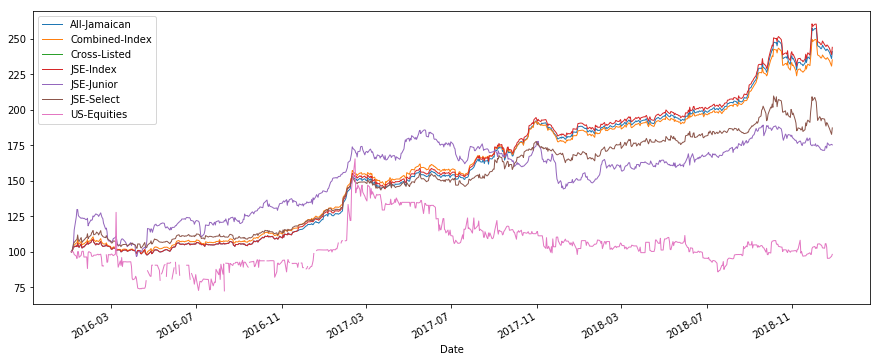

In [12]:
indicesplot = ((df_ind_data / df_ind_data.iloc[0]) * 100)
indicesplot.sort_index(axis=0).head()
indicesplot.plot(figsize=(15, 6),linewidth=1);
#plt.rcParams.update({'font.size': 12})
#(df_ind_data / df_ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()


In [13]:
#indicies Annual Rate of Return
annual_ind_returns = ind_returns.apply(lambda x: (x.mean()*250) if  x.count() > 250 else (x.mean() * x.count())) 
#annual_ind_returns = ind_returns.mean() * ind_returns.count()
round(annual_ind_returns[:] * 100,5)

All-Jamaican      29.35355
Combined-Index    28.52313
Cross-Listed      -4.87890
JSE-Index         29.74926
JSE-Junior        18.72227
JSE-Select        20.92500
US-Equities      -18.40013
dtype: float64

<h3> Analysis for Jamaia Stocks </h3>

In [14]:
# This is simple rate of returns 
#rate_return = (stkframe/stkframe.shift(1))-1
# same as 
#rate_return = stkframe.pct_change()

# This is simple rate of returns with dividends involved
#rate_return = ((stkframe+divframe)/stkframe.shift(1))-1

# This is rate of returns with log
#rate_return_div = np.log((stkframe+divframe)/stkframe.shift(1))
rate_return_div = np.log(stkframe/stkframe.shift(1))
rate_return = np.log(stkframe/stkframe.shift(1))
rate_return = rate_return.replace([np.inf, -np.inf], np.nan)
rate_return.head()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.032790,0.152469,0.003743,0.028171,0.0,0.0,-0.022188,NaN,0.015353,0.000000,...,0.025180,NaN,NaN,0.0,NaN,-0.002148,NaN,NaN,NaN,0.000000
2016-01-06,0.037246,0.233194,0.000000,0.021979,0.0,0.0,0.009569,NaN,-0.007069,0.213574,...,0.062373,NaN,NaN,0.0,NaN,0.002148,NaN,NaN,NaN,0.000000
2016-01-07,0.030652,0.080658,-0.003743,0.000000,0.0,0.0,0.158224,0.089904,-0.001982,-0.080043,...,0.011387,NaN,NaN,0.0,NaN,0.000000,0.198851,NaN,NaN,-0.068668
2016-01-08,0.054092,-0.029965,0.000000,0.206705,0.0,0.0,-0.108678,0.045670,-0.005637,0.040822,...,0.030332,NaN,NaN,0.0,NaN,0.000000,0.165792,NaN,NaN,0.077718


In [15]:
rate_return.tail()

,CCC,1834,AFS,AMG,BIL,BPOW,BRG,CAC,CAR,CBNY,...,SJ,SML,SOS,SRA,SSLVC,SVL,TTECH,VMIL,WISYNCO,XFUND
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-20,0.035100,0.000000,-0.025868,0.096392,0.067736,0.000000,0.027752,0.0,0.006417,0.0,...,-0.004759,0.057629,0.068005,0.0,0.000000,0.001930,0.000000,-0.005618,-0.011472,0.000999
2018-12-21,0.037956,0.000000,0.051880,0.000000,0.118455,0.000000,0.072571,0.0,-0.007491,0.0,...,-0.030850,0.000000,0.000000,0.0,0.025975,-0.042001,0.000000,0.016760,0.001921,0.017805
2018-12-24,-0.071850,0.000000,0.000000,0.042334,0.125925,-0.092894,0.000000,0.0,-0.001075,0.0,...,-0.016184,0.046884,-0.019803,0.0,0.000000,0.011992,0.000000,-0.030945,0.000000,-0.020803
2018-12-27,0.007446,-0.072103,0.000000,-0.080907,0.023851,-0.079158,0.000000,0.0,-0.026145,0.0,...,-0.003163,0.001907,-0.048202,0.0,0.000000,0.032576,-0.141938,0.055570,0.012399,0.044060
2018-12-28,0.038033,0.072103,0.000000,0.038572,0.045860,-0.001918,-0.010510,0.0,0.043203,0.0,...,-0.011417,0.000000,0.030397,0.0,0.000000,0.019048,0.000000,0.000000,-0.092282,0.199887


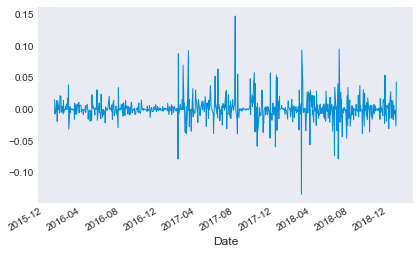

<Figure size 2400x2000 with 0 Axes>

In [63]:
#Sample of rate of return
sym = 'CAR'

rate_return[sym].plot(lw=1)
plt.figure(figsize=(30,25), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 10})
plt.show()

[]

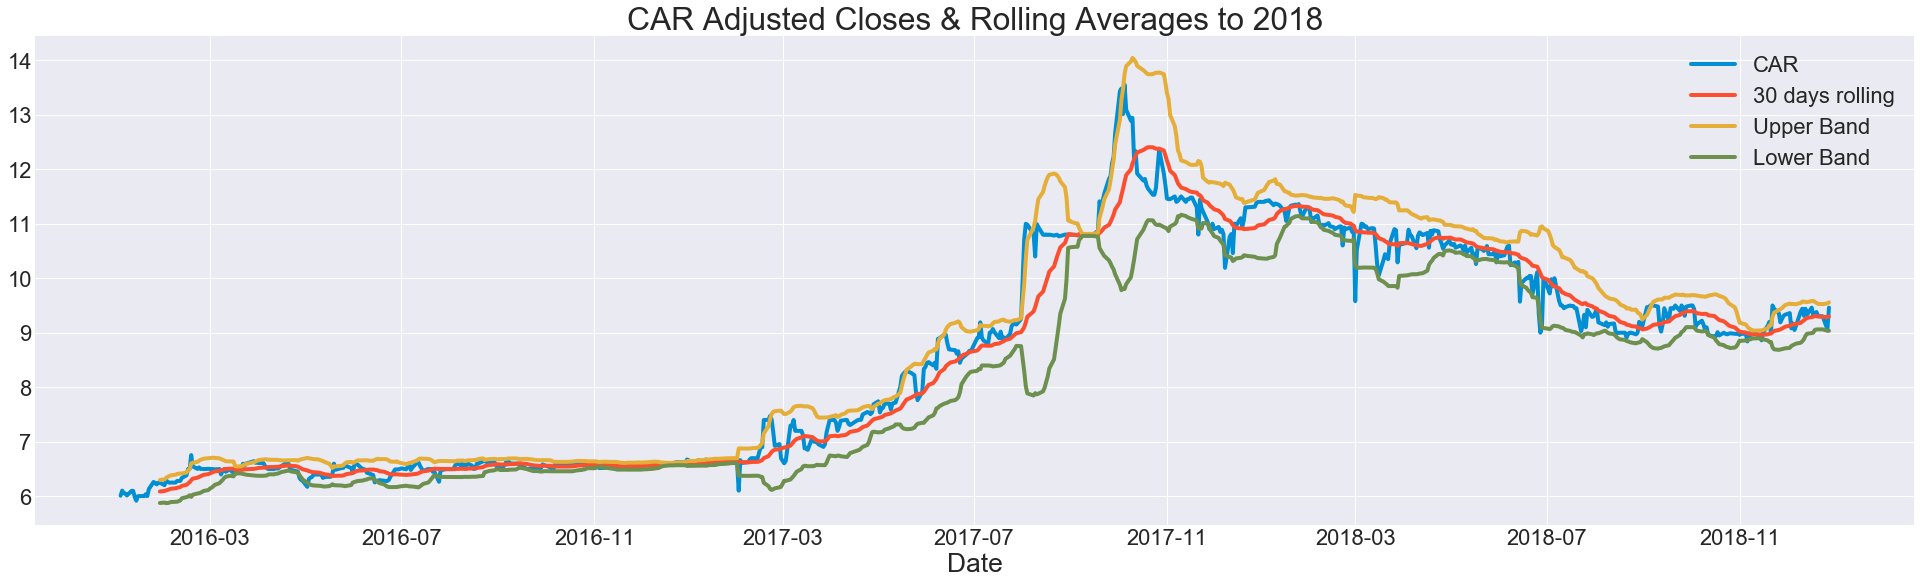

In [64]:




df_closing = stkframe[sym]
df_30days = df_closing.rolling(window=20).mean()
df_30std = df_closing.rolling(window=20).std()
df_upperband = df_30days + (df_30std * 2)
df_lowerband = df_30days - (df_30std * 2)

#df_30days = df_closing.rolling( 30 ).mean()
#df_expand = df_closing.expanding().mean()
#df_ewm = df_closing.ewm(alpha=0.03).mean()

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
ax.plot(df_closing.index, df_closing, label=sym)
ax.plot(df_30days.index, df_30days, label='30 days rolling') #simple moving average
ax.plot(df_upperband.index, df_upperband, label='Upper Band') #simple moving average
ax.plot(df_lowerband.index, df_lowerband, label='Lower Band') #simple moving average


#ax.plot(df_30days.index, df_30days, label='30 days rolling') #simple moving average
#ax.plot(df_expand.index, df_30days, label='Expanding Average')
#ax.plot(df_ewm.index, df_ewm, label='EWMA($\\alpha=.03$)') # Exponentially weighted moving average

ax.grid()
ax.legend(loc=0)
ax.set_xlabel('Date')
plt.title(sym+' Adjusted Closes & Rolling Averages to 2018')
plt.plot()

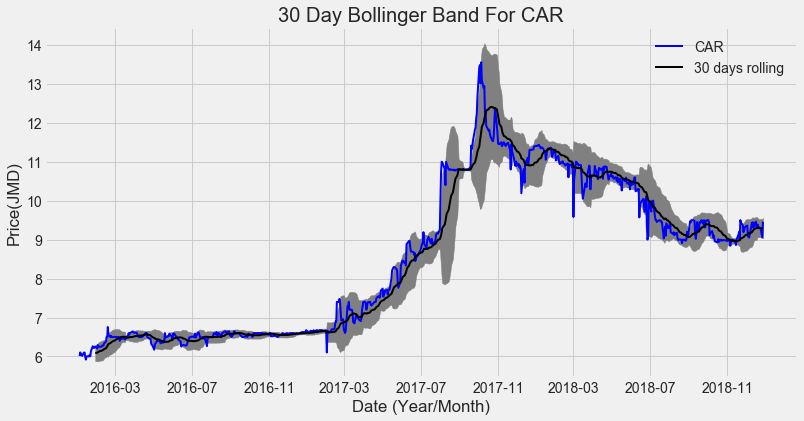

In [65]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = df_closing.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, df_upperband, df_lowerband, color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, df_closing, color='blue', lw=2)
ax.plot(x_axis, df_30days, color='black',label='30 days rolling', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For '+ sym)
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(JMD)')
ax.legend()
plt.show();

In [66]:
rate_return[sym].dropna().head(),rate_return[sym].tail()

(Date
 2016-01-05    0.015353
 2016-01-06   -0.007069
 2016-01-07   -0.001982
 2016-01-08   -0.005637
 2016-01-11    0.014032
 Name: CAR, dtype: float64, Date
 2018-12-20    0.006417
 2018-12-21   -0.007491
 2018-12-24   -0.001075
 2018-12-27   -0.026145
 2018-12-28    0.043203
 Name: CAR, dtype: float64)

In [67]:
stkframe[sym].dropna().head(),stkframe[sym].tail()

(Date
 2016-01-04    6.011
 2016-01-05    6.104
 2016-01-06    6.061
 2016-01-07    6.049
 2016-01-08    6.015
 Name: CAR, dtype: float64, Date
 2018-12-20    9.38
 2018-12-21    9.31
 2018-12-24    9.30
 2018-12-27    9.06
 2018-12-28    9.46
 Name: CAR, dtype: float64)

In [68]:

#Calculate the Average Rate of Return

avg_returns = rate_return_div.apply(lambda x: (x.mean()*250) if  x.count() > 250 else (x.mean() * x.count()))

# Drop all records with no application
avg_returns = avg_returns.dropna()
# Drop all record with 0 as rate of return
#avg_returns = avg_returns.drop(avg_returns[avg_returns == 0].index)
round(avg_returns[avg_returns > 0].sort_values(),5)*100

LASF          4.441000
PURITY        4.632000
XFUND         4.934000
MJE           5.575000
AMG           9.315000
SIL          10.220000
SSLVC        10.821000
KREMI        11.872000
ProvenJA     11.973000
SEP          11.975000
VMIL         13.276000
CAR          15.156000
JAMT         15.376000
KPREIT       17.777000
GENAC        18.540000
SGJ          19.261000
KLE          19.981000
MDS          20.216000
TTECH        20.362000
KEY          20.556000
SJ           20.965000
MIL          24.962000
CFF          24.974000
CCC          25.651000
FOSRICH      26.906000
JSE          30.642000
JMMBGL       33.923000
JBG          34.102000
ELITE        37.501000
AFS          38.243000
PTL          39.107000
EPLY         40.657000
SVL          41.020000
CAC          41.559000
BPOW         46.141000
SALF         46.255000
NCBFG        47.525000
PULS         53.680000
MUSIC        56.779000
MEEG         60.561000
KEX          61.416000
DTL          63.756000
KW           64.035000
BRG        

In [69]:
#find the stocks that have split
round(avg_returns[avg_returns <= 0].sort_values(),5)*100

GWEST     -58.128
EFRESH    -54.172
RJR       -48.981
SCIJMD    -47.594
CHL       -32.693
CBNY      -18.704
SCIJA     -18.349
PJX       -15.394
HONBUN    -15.332
1834      -13.064
JP        -11.609
LASD      -10.848
PJAM      -10.699
GK         -9.727
138SL      -9.134
SML        -4.652
CPJ        -4.066
SRA        -3.702
WISYNCO    -2.858
DCOVE      -1.096
LASM       -0.671
dtype: float64

<h3> Calculate Stock Return Risk (Standard Deviation) </h3>

In [70]:
stk_std_risk = rate_return.apply(lambda x: (x.std()* 250 ** 0.5 ) if  x.count() > 250 else (x.std() * x.count() ** 0.5))
round(stk_std_risk.sort_values(),5) * 100

SRA          14.877
ProvenJA     16.139
SCIJA        18.349
NCBFG        27.431
CAR          28.765
MJE          29.389
SJ           32.821
138SL        33.836
SSLVC        35.379
WISYNCO      35.843
VMIL         37.104
SML          39.706
SCIJMD       40.695
JBG          40.931
KW           45.453
XFUND        46.122
PJX          47.303
JMMBGL       48.228
SGJ          48.378
DCOVE        48.622
INDIES       48.630
AFS          49.195
KPREIT       51.269
ROC          53.592
SEP          54.458
CAC          54.847
EFRESH       55.061
LASM         55.327
ELITE        55.690
SVL          56.814
             ...   
GK           66.602
JSE          66.967
BRG          67.062
GWEST        67.458
CCC          68.084
FOSRICH      70.477
1834         70.938
PTL          71.034
BPOW         71.305
KEY          71.750
TTECH        71.990
PAL          72.211
MDS          72.694
DTL          73.031
MUSIC        74.268
MIL          77.238
JAMT         77.493
KLE          78.330
PURITY       80.299


<h3> Sharpe Ratio </h3>

In [71]:
jm_globalbond_riskfreerate = 0.05
sharpe = (avg_returns - jm_globalbond_riskfreerate) / stk_std_risk
sharpe[sharpe > 0].sort_values() 

MJE         0.019560
AMG         0.068494
KREMI       0.085518
SIL         0.085699
SEP         0.128088
JAMT        0.133897
SSLVC       0.164541
KLE         0.191258
MDS         0.209312
GENAC       0.211149
TTECH       0.213386
KEY         0.216803
VMIL        0.223045
KPREIT      0.249209
MIL         0.258443
SGJ         0.294774
CCC         0.303318
FOSRICH     0.310826
CFF         0.341739
CAR         0.353090
JSE         0.382911
ProvenJA    0.432091
PTL         0.480147
SJ          0.486425
PULS        0.500822
BPOW        0.576980
EPLY        0.579235
ELITE       0.583598
JMMBGL      0.599709
SVL         0.633987
MEEG        0.661860
CAC         0.666567
AFS         0.675734
SALF        0.692854
MUSIC       0.697183
JBG         0.710999
DTL         0.804545
BRG         0.882586
KEX         0.963584
SOS         0.991222
JETCON      1.029808
ECL         1.098214
PAL         1.234043
BIL         1.292556
KW          1.298807
ISP         1.361597
INDIES      1.396580
NCBFG       1

In [72]:
sharpe[sharpe <= 0].sort_values() 

SCIJMD    -1.292405
SCIJA     -1.272497
EFRESH    -1.074647
GWEST     -0.935811
SRA       -0.584960
RJR       -0.546431
PJX       -0.431131
138SL     -0.417723
LASD      -0.275047
CHL       -0.270588
1834      -0.254642
SML       -0.243088
GK        -0.221115
WISYNCO   -0.219221
CBNY      -0.192675
HONBUN    -0.171209
PJAM      -0.155976
JP        -0.140340
CPJ       -0.138249
DCOVE     -0.125374
LASM      -0.102505
LASF      -0.008558
PURITY    -0.004584
XFUND     -0.001423
dtype: float64

<h3> Stock Correlation </h3>

In [73]:
rate_with_index = pd.merge(rate_return,ind_returns[['JSE-Index', 'JSE-Junior']],left_index=True,right_index=True)

#Variance of two stocks
rate_with_index[[sym,'JSE-Index']].var() 

CAR          0.000331
JSE-Index    0.000076
dtype: float64

In [74]:
#Annualize the Variance
rate_with_index[[sym,'JSE-Index']].var() * 250

CAR          0.082740
JSE-Index    0.019076
dtype: float64

In [75]:
#Covariance of two stock
rate_with_index[[sym,'JSE-Index']].cov() 

,CAR,JSE-Index
CAR,0.000331,0.000019
JSE-Index,0.000019,0.000076


In [76]:
#Annualize covariance of two stock
rate_with_index[[sym,'JSE-Index']].cov() * 250

,CAR,JSE-Index
CAR,0.08274,0.004690
JSE-Index,0.00469,0.019076


In [77]:
#Correlation of returns of two stock
rate_with_index[[sym,'JSE-Index']].corr()

,CAR,JSE-Index
CAR,1.00000,0.11805
JSE-Index,0.11805,1.00000


<h3> Capital Asset Pricing Model <span>(CAPM)</span>  </h3>

In [78]:
#Calculate the Beta of all stocks
asym = []
abeta = []
for sy in rate_return.T.index:    
    adjrate = rate_with_index[[sy,'JSE-Index']].dropna()
    annual_count = 250 if adjrate[sy].count() > 250 else adjrate[sy].count()    
    cov = adjrate.cov() * annual_count
    var = adjrate['JSE-Index'].var() * annual_count
    beta = cov.iloc[0,1]/var
    
    #rate = rate_with_index[[sy,'JSE-Index']].dropna()
    #x = rate[sy].tolist()
    #y = rate['JSE-Index'].tolist()        
    
    #x = np.reshape(x, (len(x), 1))
    #y = np.reshape(y, (len(y), 1))    
    #x1 = sm.add_constant(x)    
    #model = sm.OLS(y, x1).fit()                
    #beta = model.params[1]
    #(beta,alpha,r_value,p_value,std_err) = stats.linregress(x,y) 
    
    
    
    asym.append(sy)
    abeta.append(beta)


beta_series = pd.Series(np.array(abeta),index=asym)
beta_series[beta_series > 0].sort_values(ascending=False)

SGJ        2.206914
NCBFG      1.221605
SJ         1.131323
CCC        1.114270
JP         0.938764
JMMBGL     0.847071
1834       0.828208
INDIES     0.802923
EFRESH     0.704957
JSE        0.599362
SVL        0.567373
XFUND      0.565712
KW         0.551669
JBG        0.532865
TTECH      0.472009
CHL        0.458558
WISYNCO    0.448535
PURITY     0.439474
HONBUN     0.420219
BIL        0.388741
MIL        0.376672
RJR        0.374911
ECL        0.373540
SSLVC      0.367483
LASD       0.347639
CBNY       0.344348
CAC        0.338541
ELITE      0.331920
SEP        0.318238
PJAM       0.317170
             ...   
JAMT       0.282725
SIL        0.271086
138SL      0.262015
CAR        0.245853
LASM       0.235201
SML        0.233379
KLE        0.231566
SALF       0.226745
JETCON     0.213405
VMIL       0.194020
GK         0.182953
GWEST      0.177508
DCOVE      0.166224
MEEG       0.157994
BRG        0.156197
KEX        0.150541
CPJ        0.146152
KEY        0.126594
PJX        0.123045


In [79]:
beta_series[beta_series < 0].sort_values(ascending=False)

AMG        -0.000466
SCIJA      -0.010475
ProvenJA   -0.012075
EPLY       -0.021779
AFS        -0.031793
KREMI      -0.040285
FOSRICH    -0.064167
CFF        -0.069619
KPREIT     -0.103839
SOS        -0.313630
dtype: float64

In [80]:
# Pull the Equity Risk Premium for Jamaica
# http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html

EquityRiskPremium = 0.126

In [81]:
# This is the CAPM for stock
round((jm_globalbond_riskfreerate + beta_series * EquityRiskPremium) * 100,4)

CCC         19.0398
1834        15.4354
AFS          4.5994
AMG          4.9941
BIL          9.8981
BPOW         5.0246
BRG          6.9681
CAC          9.2656
CAR          8.0977
CBNY         9.3388
138SL        8.3014
CFF          4.1228
CHL         10.7778
CPJ          6.8415
DCOVE        7.0944
DTL          6.3505
ECL          9.7066
EFRESH      13.8825
ELITE        9.1822
EPLY         4.7256
FOSRICH      4.1915
GENAC        6.0170
GK           7.3052
GWEST        7.2366
HONBUN      10.2948
INDIES      15.1168
ISP          5.7499
JAMT         8.5623
JBG         11.7141
JETCON       7.6889
             ...   
MEEG         6.9907
MIL          9.7461
MJE          5.6872
MUSIC        5.1173
NCBFG       20.3922
PAL          8.8244
PJAM         8.9963
PJX          6.5504
PTL          6.2781
PULS         5.1013
PURITY      10.5374
ProvenJA     4.8479
RJR          9.7239
ROC          5.1911
SALF         7.8570
SCIJA        4.8680
SCIJMD       8.6608
SEP          9.0098
SGJ         32.8071


<h2> Stock Regression </h2>

In [82]:
df_merge = pd.merge(stkframe,df_ind_data,left_index=True,right_index=True)
jseindex = df_merge[['JSE-Index',sym]].dropna()['JSE-Index'].tolist()
stock_list = df_merge[['JSE-Index',sym]].dropna()[sym].tolist()

In [83]:
jseindex = np.reshape(jseindex, (len(jseindex), 1))
stock_list = np.reshape(stock_list, (len(stock_list), 1))

In [84]:
jseindex[1:5]

array([[151684.04],
       [154252.66],
       [157084.38],
       [156723.37]])

In [85]:
jseindex1 = sm.add_constant(jseindex)
reg = sm.OLS(stock_list, jseindex1).fit()

In [86]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     992.7
Date:                Sun, 30 Dec 2018   Prob (F-statistic):          2.86e-139
Time:                        17:28:21   Log-Likelihood:                -1242.8
No. Observations:                 749   AIC:                             2490.
Df Residuals:                     747   BIC:                             2499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4195      0.169     20.214      0.0

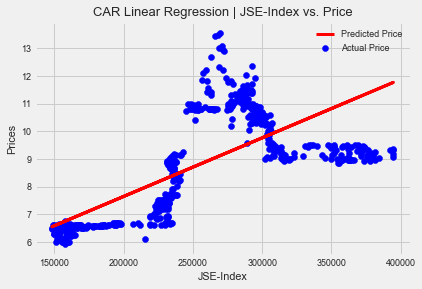

In [87]:
#Regression on Price vs Time
regressor = LinearRegression()
regressor.fit(jseindex, stock_list)
plt.rcParams.update({'font.size': 9})
plt.scatter(jseindex,stock_list, color='blue', label= 'Actual Price')
plt.plot(jseindex, regressor.predict(jseindex), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title(sym +' Linear Regression | JSE-Index vs. Price')
plt.legend()
plt.xlabel('JSE-Index')
plt.ylabel('Prices')
plt.show()

<h3> Prediction Model Stock</h3>

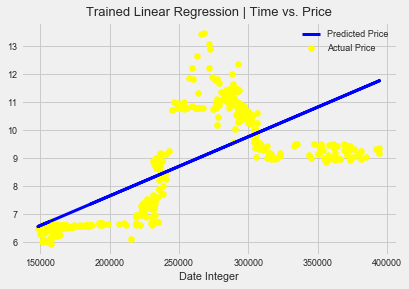

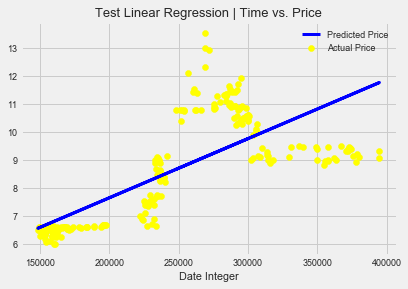

In [88]:
#Splitting the dataset into the Training set and Test set
xtrain, xtest, ytrain, ytest = train_test_split(jseindex, stock_list, test_size=0.33, random_state=42)

xtrain = np.reshape(xtrain, (len(xtrain), 1))
ytrain = np.reshape(ytrain, (len(ytrain), 1))

xtest = np.reshape(xtest, (len(xtest), 1))
ytest = np.reshape(ytest, (len(ytest), 1))

regressor.fit(xtrain, ytrain)
plt.rcParams.update({'font.size': 9})

#Train Set Graph
plt.scatter(xtrain, ytrain, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Trained Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Test Set Graph
plt.scatter(xtest, ytest, color='yellow', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Test Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

<h3> MACD'S </H3>

In [92]:
qoutes = pd.DataFrame(data=stkframe[sym].values,index=stkframe.index.values, columns={'AdjClose',})
quotes = macd.getMvgAvg(qoutes,12,'MvgAvgShort')   #12 point moving average
quotes = macd.getMvgAvg(quotes,26,'MvgAvgLong')   #26 point moving average
quotes = macd.getMACDSignal(quotes)
quotes = macd.getMACDMvgAvg(quotes,9)
quotes = macd.getMACDTrigger(quotes)
qoutes[qoutes.MACDTrigger == 1]

,AdjClose,MvgAvgShort,MvgAvgLong,MACD,MACDMvgAvg9,MACDTrigger
2016-02-09,6.281,6.2514,6.1359,0.1155,NaN,1.0
2016-02-11,6.281,6.2530,6.1427,0.1103,NaN,1.0
2016-02-12,6.336,6.2607,6.1533,0.1074,NaN,1.0
2016-02-15,6.384,6.2745,6.1662,0.1083,NaN,1.0
2016-02-16,6.500,6.2953,6.1848,0.1105,NaN,1.0
2016-02-17,6.500,6.3162,6.2002,0.1160,NaN,1.0
2016-02-18,6.756,6.3622,6.2255,0.1367,NaN,1.0
2016-02-19,6.548,6.3833,6.2471,0.1362,NaN,1.0
2016-02-22,6.502,6.4033,6.2695,0.1338,0.1194,1.0
2016-02-23,6.530,6.4267,6.2898,0.1369,0.1218,1.0


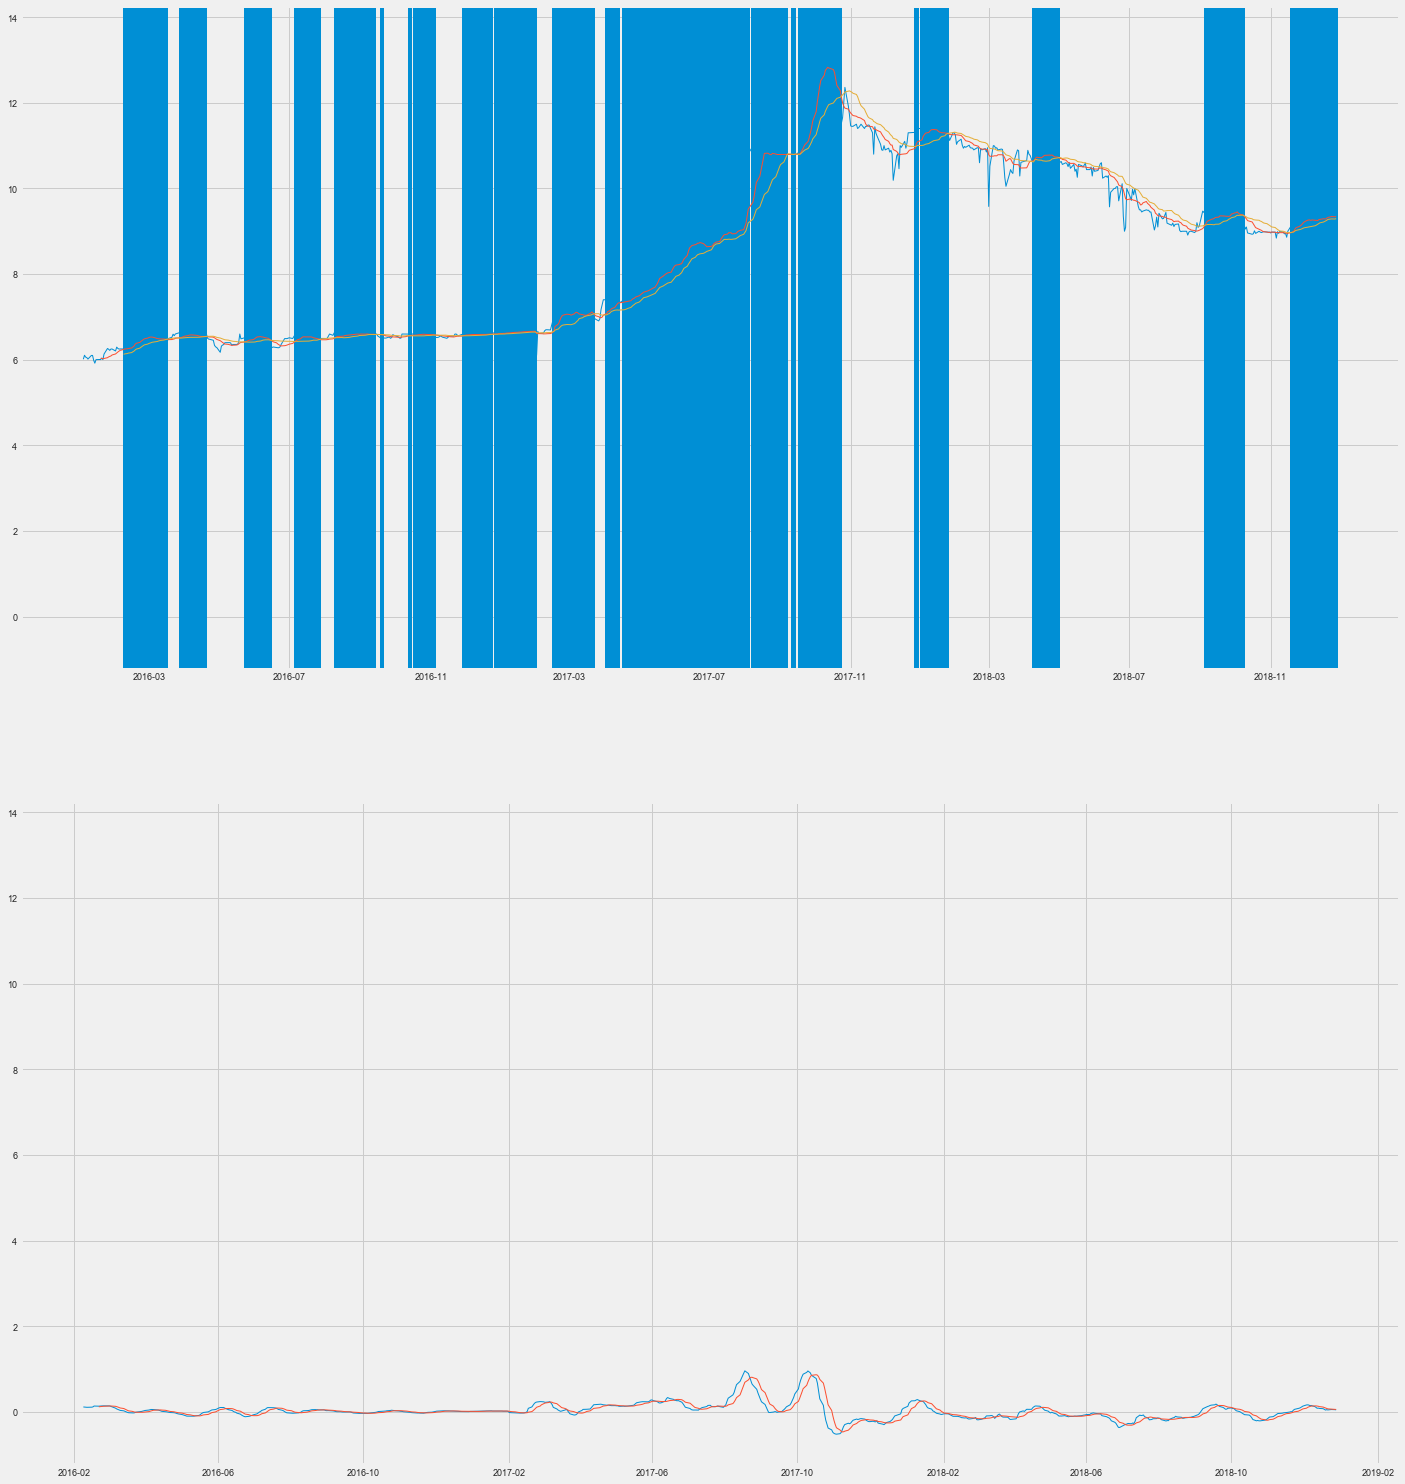

In [99]:
fig = plt.figure(figsize=(22,25))
grid = plt.GridSpec(2, 1, hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0],sharey=ax1)

for cory in quotes[qoutes.MACDTrigger == 1].index:
    ax1.axvline(x=cory)
    

ax1.plot(quotes['AdjClose'].index, quotes['AdjClose'], label=sym,lw=1)
ax1.plot(quotes['MvgAvgShort'].index, quotes['MvgAvgShort'], label='MvgAvgShort',lw=1) #simple moving average
ax1.plot(quotes['MvgAvgLong'].index, quotes['MvgAvgLong'], label='MvgAvgLong',lw=1) #simple moving average

#ax1.scatter(x=quotes[qoutes.MACDTrigger == 1].index, y=quotes[qoutes.MACDTrigger == 1]['AdjClose'], c='red', marker='D', s=10)

ax2.plot(quotes['MACD'].index, quotes['MACD'], label='MACD',lw=1)
ax2.plot(quotes['MACDMvgAvg9'].index, quotes['MACDMvgAvg9'], label='MACDMvgAvg9',lw=1) #simple moving average

plt.show()

<h2> Calculating Portfolio </h2>

In [44]:
# Find Stock that has the same about of trade days
value = stkframe.count(axis=0)
value = value.index[stkframe.count(axis=0) == stkframe['CAR'].count()]
value

Index(['CCC', '1834', 'AFS', 'AMG', 'BIL', 'BPOW', 'BRG', 'CAR', 'CBNY',
       '138SL', 'CFF', 'CHL', 'CPJ', 'DCOVE', 'DTL', 'EPLY', 'GENAC', 'GK',
       'HONBUN', 'JAMT', 'JBG', 'JMMBGL', 'JP', 'JSE', 'KEX', 'KLE', 'KPREIT',
       'KREMI', 'KW', 'LASD', 'LASF', 'LASM', 'MDS', 'MIL', 'PAL', 'PJAM',
       'PTL', 'PULS', 'PURITY', 'ProvenJA', 'RJR', 'SALF', 'SEP', 'SGJ', 'SIL',
       'SJ', 'SRA', 'SVL', 'XFUND'],
      dtype='object')

In [45]:
#Create Porfolio by randomly selecting 6 Stocks
selectStock = []
for i in range(0,6):
    rand_indx = np.random.randint(len(value))
    selectStock.append(value[rand_indx])

selectStock = ['CAR','GWEST','JMMBGL','JSE','SCIJMD','VMIL']

In [46]:
rate_return[selectStock].describe()

,CAR,GWEST,JMMBGL,JSE,SCIJMD,VMIL
count,748.000000,254.000000,748.000000,748.000000,134.000000,250.000000
mean,0.000606,-0.002325,0.001357,0.001226,-0.003552,0.000531
std,0.018192,0.042664,0.030502,0.042354,0.035155,0.023467
min,-0.133662,-0.211880,-0.198338,-0.261032,-0.146977,-0.068614
25%,-0.005042,-0.009217,-0.010777,-0.007743,-0.012439,-0.009896
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005397,0.000000,0.012191,0.007249,0.007491,0.010076
max,0.147301,0.230987,0.187460,0.375943,0.101441,0.190518


C:\Users\Romayne\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


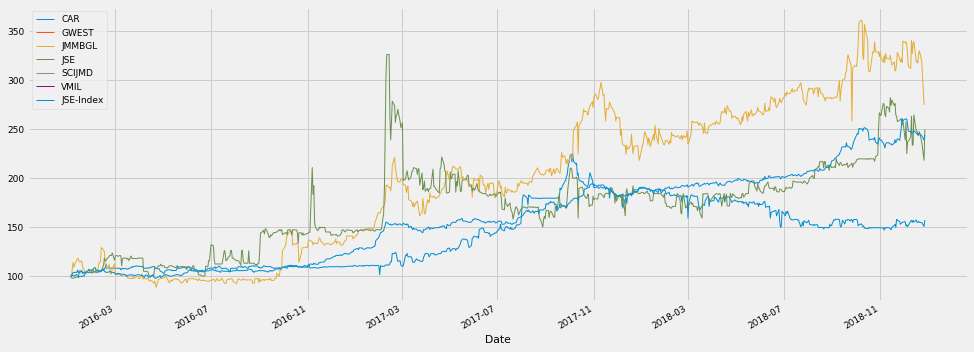

In [47]:
plt.rcParams.update({'font.size': 9})
portfolio_compare = pd.DataFrame
portfolio_compare = stkframe[selectStock]
portfolio_compare['JSE-Index'] = df_ind_data['JSE-Index']
(portfolio_compare / portfolio_compare.iloc[0] * 100).plot(figsize = (15, 6),linewidth=1);
plt.show()
#df_ind_data['JSE-Index']
#portfolio_compare[selectStock].tail()

<h3> Calculate Portfolio Rate of Return </h3>

In [48]:
#Equally weighted Portfolio
weights = np.array([0.381762259,0.005572008,0.007400742,0.027681738,0.03950554,0.538077713])

In [49]:
pfolio_rate_return = str(round(np.dot(avg_returns[selectStock], weights),5) * 100) + "%"
'Returns on Porfolio :' + pfolio_rate_return 

'Returns on Porfolio :11.825%'

<h3> Calculate Portfolio Risk </h3>

In [50]:
# Calculate the covariance of the total portfolio
portfolio_var = np.dot(weights.T, np.dot(rate_return[selectStock].cov() * 250, weights))
'Variance :' + str(round(portfolio_var,5)*100) + '%'

'Variance :5.428999999999999%'

In [51]:
#Portfolio Volatilty
portfolio_vol = np.dot(weights.T, np.dot(rate_return[selectStock].cov() * 250, weights)) ** 0.5
'Volitility :' + str(round(portfolio_vol, 3)*100) + '%' 

'Volitility :23.3%'

<h3> Markowitz Portfolio effeciency Frontier </h3>

In [52]:
(rate_return[selectStock].mean() * 250)*100,rate_return[selectStock].cov() * 250,rate_return[selectStock].corr()

(CAR       15.156459
 GWEST    -58.127757
 JMMBGL    33.922535
 JSE       30.642286
 SCIJMD   -88.794471
 VMIL      13.275949
 dtype: float64,
              CAR     GWEST    JMMBGL       JSE    SCIJMD      VMIL
 CAR     0.082740  0.011207  0.001647  0.000823  0.002535  0.002441
 GWEST   0.011207  0.455056 -0.005805 -0.033182 -0.005905 -0.002784
 JMMBGL  0.001647 -0.005805  0.232590  0.030194  0.021860  0.009320
 JSE     0.000823 -0.033182  0.030194  0.448455 -0.036426 -0.013595
 SCIJMD  0.002535 -0.005905  0.021860 -0.036426  0.308964  0.018243
 VMIL    0.002441 -0.002784  0.009320 -0.013595  0.018243  0.137674,
              CAR     GWEST    JMMBGL       JSE    SCIJMD      VMIL
 CAR     1.000000  0.051515  0.011871  0.004273  0.014991  0.020245
 GWEST   0.051515  1.000000 -0.017123 -0.100827 -0.015771 -0.011438
 JMMBGL  0.011871 -0.017123  1.000000  0.093490  0.064699  0.049909
 JSE     0.004273 -0.100827  0.093490  1.000000 -0.124476 -0.074715
 SCIJMD  0.014991 -0.015771  0.064699 -0

In [53]:
frontier_pfolio_return = []
frontier_pfolio_vol = []
frontier_pfolio_weight = []
frontier_pfolio_sharpe = []
for x in range(0, 50000):
    ef_weights = np.random.random(len(selectStock))
    ef_weights /= np.sum(ef_weights)
    preturn = np.dot(avg_returns[selectStock]*100, ef_weights)
    pvol = np.sqrt(np.dot(ef_weights.T, np.dot(rate_return[selectStock].cov() * 250, ef_weights)))*100
    psharpe = (preturn - jm_globalbond_riskfreerate) / pvol
    #add values to list
    frontier_pfolio_return.append(preturn)
    frontier_pfolio_vol.append(pvol)
    frontier_pfolio_weight.append(ef_weights)
    frontier_pfolio_sharpe.append(psharpe)
    
frontier_pfolio_return = np.array(frontier_pfolio_return)
frontier_pfolio_vol = np.array(frontier_pfolio_vol)
frontier_pfolio_weight = np.array(frontier_pfolio_weight)
frontier_pfolio_sharpe = np.array(frontier_pfolio_sharpe)


frontier_pfolio_return[:5],frontier_pfolio_vol[:5]

(array([  0.99358806, -13.18414955,  -9.84096517,  -5.54688073,
         -6.20602118]),
 array([26.13306975, 25.2937577 , 28.06611718, 21.66054983, 24.72045616]))

In [54]:
frontier_pfolio_frame = pd.DataFrame({'Return':frontier_pfolio_return,'Volitile':frontier_pfolio_vol,'Sharpe':frontier_pfolio_sharpe})

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selectStock):
    frontier_pfolio_frame[symbol+' weight'] = [weight[counter] for weight in frontier_pfolio_weight]
    
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = frontier_pfolio_frame['Volitile'].min()
max_sharpe = frontier_pfolio_frame['Sharpe'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = frontier_pfolio_frame.loc[frontier_pfolio_frame['Sharpe'] == max_sharpe]
min_variance_port = frontier_pfolio_frame.loc[frontier_pfolio_frame['Volitile'] == min_volatility]

frontier_pfolio_frame=frontier_pfolio_frame.sort_values(by=['Volitile'],ascending=False)
frontier_pfolio_frame.head()

,Return,Volitile,Sharpe,CAR weight,GWEST weight,JMMBGL weight,JSE weight,SCIJMD weight,VMIL weight
13071,21.695597,47.336598,0.457270,0.155425,0.001014,0.021082,0.705672,0.073772,0.043035
47782,23.449859,46.279998,0.505615,0.082194,0.022339,0.009617,0.688837,0.008982,0.188030
44705,-34.058028,44.937427,-0.759012,0.053378,0.650750,0.011228,0.190355,0.074026,0.020262
36793,16.656356,44.355912,0.374389,0.080226,0.077261,0.056327,0.660724,0.063923,0.061539
36415,-34.425572,44.191826,-0.780135,0.000693,0.648096,0.069131,0.050989,0.061430,0.169661


In [55]:
frontier_pfolio_frame.tail()

,Return,Volitile,Sharpe,CAR weight,GWEST weight,JMMBGL weight,JSE weight,SCIJMD weight,VMIL weight
29243,6.892715,18.670823,0.366492,0.413061,0.073697,0.128415,0.104419,0.104526,0.175883
16831,6.968028,18.668672,0.370569,0.361207,0.081575,0.152856,0.065761,0.089706,0.248894
10732,6.552319,18.663077,0.348406,0.346810,0.066123,0.123525,0.079188,0.108099,0.276256
27586,4.947026,18.634826,0.262789,0.417695,0.091822,0.119765,0.068497,0.102190,0.200032
35798,7.209023,18.557647,0.385772,0.359712,0.069075,0.124445,0.097606,0.099813,0.249350


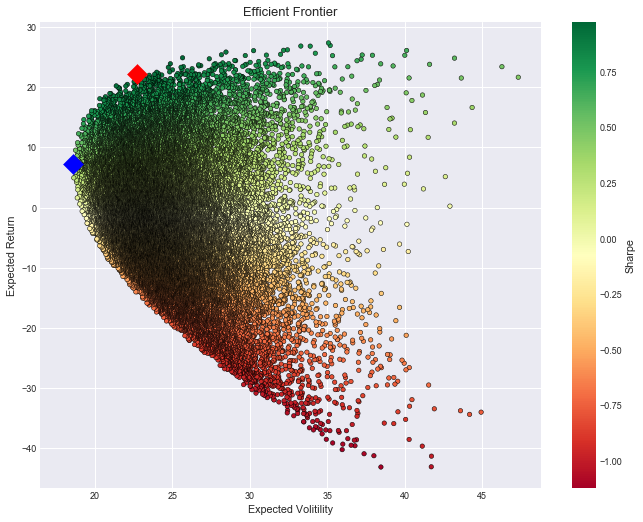

In [56]:
plt.style.use('seaborn-dark')
frontier_pfolio_frame.plot(x='Volitile',y='Return',c='Sharpe',kind='scatter',cmap='RdYlGn', edgecolors='black',
                           figsize=(10,8),grid=True);

plt.scatter(x=sharpe_portfolio['Volitile'], y=sharpe_portfolio['Return'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volitile'], y=min_variance_port['Return'], c='blue', marker='D', s=200 )

plt.xlabel('Expected Volitility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()

In [57]:
# Red Dot portfolio with best Sharpe ratio (Best returns for risk)
sharpe_portfolio

,Return,Volitile,Sharpe,CAR weight,GWEST weight,JMMBGL weight,JSE weight,SCIJMD weight,VMIL weight
5516,22.234644,22.728127,0.976088,0.336992,0.004724,0.346103,0.106424,0.00545,0.200307


In [58]:
# Blue Dot stock with least varience / risk
min_variance_port

,Return,Volitile,Sharpe,CAR weight,GWEST weight,JMMBGL weight,JSE weight,SCIJMD weight,VMIL weight
35798,7.209023,18.557647,0.385772,0.359712,0.069075,0.124445,0.097606,0.099813,0.24935
